In [1]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.transform
import skimage.io as skio
import scipy.signal as ssg
import matplotlib.pyplot as plt

In [2]:
# name of the input file
imname = 'imgs/cameraman.png'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)
im = sk.img_as_float(im)

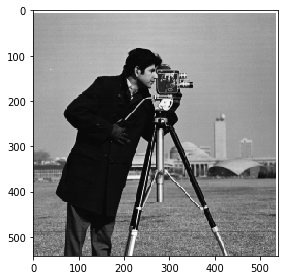

In [3]:
skio.imshow(im)

In [4]:
# Display the grayscale images
def grayscale(color):
    gray = np.repeat(color.reshape(color.shape[0], -1, 1), 3, axis=-1)
    skio.imshow(gray)
    skio.show()

Part 1.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dx


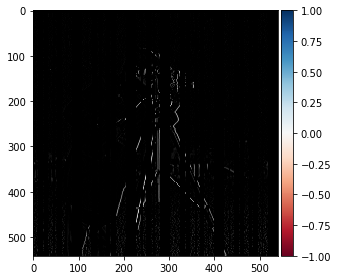

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dy


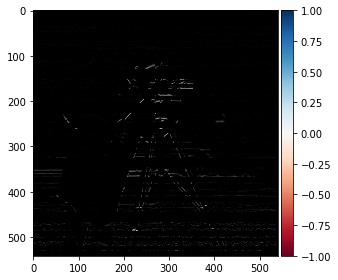

C:\Users\Evan\AppData\Roaming\Python\Python39\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Gradient Magnitude


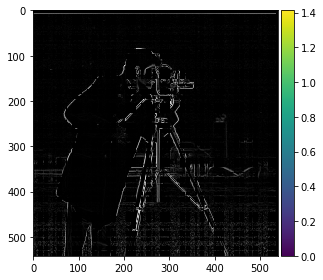

Clipped Gradient Magnitude


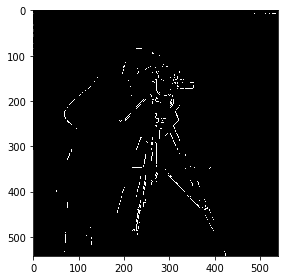

In [5]:
dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])
convolve_x = ssg.convolve2d(im[:, :, 0], dx, mode='same')
convolve_y = ssg.convolve2d(im[:, :, 0], dy, mode='same')
grad_mag = np.sqrt(convolve_x**2 + convolve_y**2)
clipped_grad_mag = np.copy(grad_mag)
clipped_grad_mag[clipped_grad_mag < 0.4] = 0
clipped_grad_mag[clipped_grad_mag > 0] = 1

print("Dx")
grayscale(convolve_x)
print("Dy")
grayscale(convolve_y)
print("Gradient Magnitude")
grayscale(grad_mag)
print("Clipped Gradient Magnitude")
grayscale(clipped_grad_mag)

Part 1.2

In [6]:
import cv2

In [7]:
gauss = cv2.getGaussianKernel(ksize=3, sigma=2)
gauss = gauss @ gauss.T

Dx

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


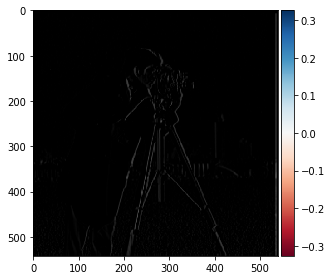

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dy


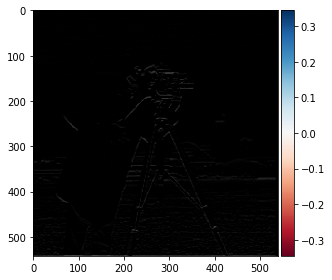

Gradient Magnitude


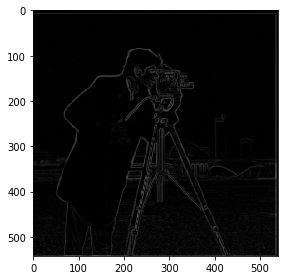

Clipped Gradient Magnitude


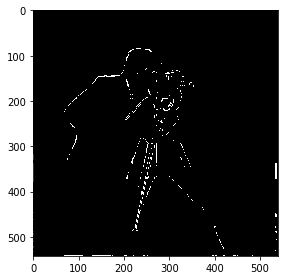

In [8]:
# Two Convolutions
blurred = ssg.convolve2d(im[:, :, 0], gauss, mode='same', boundary="symm")

dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])
convolve_x = ssg.convolve2d(blurred, dx, mode='same', boundary="symm")
convolve_y = ssg.convolve2d(blurred, dy, mode='same', boundary="symm")
grad_mag = np.sqrt(convolve_x**2 + convolve_y**2)
clipped_grad_mag = np.copy(grad_mag)
clipped_grad_mag[clipped_grad_mag < 0.2] = 0
clipped_grad_mag[clipped_grad_mag > 0] = 1

print("Dx")
grayscale(convolve_x)
print("Dy")
grayscale(convolve_y)
print("Gradient Magnitude")
grayscale(grad_mag)
print("Clipped Gradient Magnitude")
grayscale(clipped_grad_mag)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dx


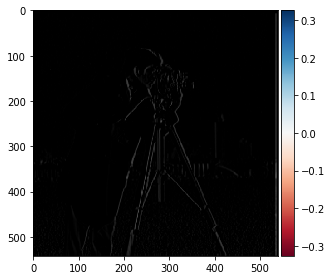

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dy


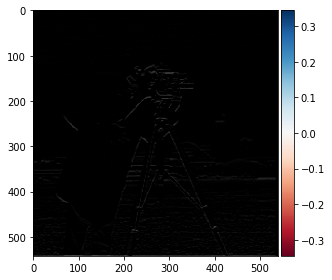

Gradient Magnitude


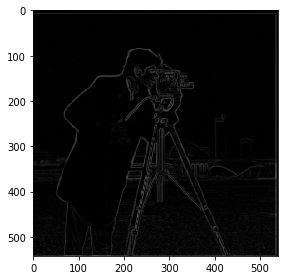

Clipped Gradient Magnitude


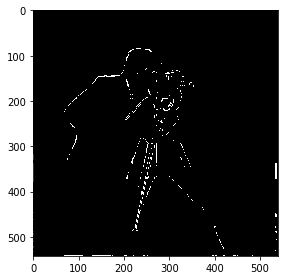

In [9]:
# One Convolution
dx = np.array([[1, -1]])
dgx = ssg.convolve2d(dx, gauss)
dy = np.array([[1], [-1]])
dgy = ssg.convolve2d(dy, gauss)
convolve_x = ssg.convolve2d(im[:, :, 0], dgx, mode='same', boundary="symm")
convolve_y = ssg.convolve2d(im[:, :, 0], dgy, mode='same', boundary="symm")
grad_mag = np.sqrt(convolve_x**2 + convolve_y**2)
clipped_grad_mag = np.copy(grad_mag)
clipped_grad_mag[clipped_grad_mag < 0.2] = 0
clipped_grad_mag[clipped_grad_mag > 0] = 1

print("Dx")
grayscale(convolve_x)
print("Dy")
grayscale(convolve_y)
print("Gradient Magnitude")
grayscale(grad_mag)
print("Clipped Gradient Magnitude")
grayscale(clipped_grad_mag)

Part 2.1

In [ ]:
def blur(sharpim):
    gauss = cv2.getGaussianKernel(ksize=6, sigma=4)
    gauss = gauss @ gauss.T

    r = ssg.convolve2d(sharpim[:, :, 0], gauss, mode='same', boundary="symm")
    g = ssg.convolve2d(sharpim[:, :, 1], gauss, mode='same', boundary="symm")
    b = ssg.convolve2d(sharpim[:, :, 2], gauss, mode='same', boundary="symm")

    blurred = np.stack([r, g, b], axis=2)
    return blurred

def unsharp(sharpim):    
    gauss = cv2.getGaussianKernel(ksize=5, sigma=10/3)
    gauss = gauss @ gauss.T
    
    kernel = np.zeros((5, 5))
    kernel[2, 2] = 2
    kernel = kernel - gauss # Combine into one filter
 
    r = ssg.convolve2d(sharpim[:, :, 0], kernel, mode='same', boundary="symm")
    g = ssg.convolve2d(sharpim[:, :, 1], kernel, mode='same', boundary="symm")
    b = ssg.convolve2d(sharpim[:, :, 2], kernel, mode='same', boundary="symm")

    sharpened = np.stack([r, g, b], axis=2)    
    return sharpened

In [ ]:
sharpim = sk.img_as_float(skio.imread('imgs/taj.jpg'))
print("Original:")
skio.imshow(sharpim)

In [ ]:
print("Sharpened:")
skio.imshow(unsharp(sharpim))

In [ ]:
sharpim = sk.img_as_float(skio.imread('imgs/ferrel.jpg'))
print("Original:")
skio.imshow(sharpim)

In [ ]:
print("Sharpened:")
skio.imshow(unsharp(sharpim))

In [ ]:
sharpim = sk.img_as_float(skio.imread('imgs/banff.png'))
print("Original:")
skio.imshow(sharpim)

In [ ]:
print("Blurred:")
skio.imshow(blur(sharpim))

In [ ]:
print("Sharpened:")
skio.imshow(unsharp(blur(sharpim)))

Part 2.3

In [ ]:
def lowpass(img, sigma):
    gauss = cv2.getGaussianKernel(ksize=max(int(2*sigma//3), 3), sigma=sigma)
    gauss = gauss @ gauss.T

    r = ssg.convolve2d(img[:, :, 0], gauss, mode='valid', boundary="symm")
    g = ssg.convolve2d(img[:, :, 1], gauss, mode='valid', boundary="symm")
    b = ssg.convolve2d(img[:, :, 2], gauss, mode='valid', boundary="symm")

    blurred = np.stack([r, g, b], axis=2)
    return blurred

def iteration_lowpass(img, num_iter, sigma):
    gauss = cv2.getGaussianKernel(ksize=max(int(2*sigma//3), 1), sigma=sigma)
    gauss = gauss @ gauss.T
    
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    for _ in range(num_iter):
        r = ssg.convolve2d(r, gauss, mode='same', boundary="symm")
        g = ssg.convolve2d(g, gauss, mode='same', boundary="symm")
        b = ssg.convolve2d(b, gauss, mode='same', boundary="symm")

    blurred = np.stack([r, g, b], axis=2)
    return blurred

In [ ]:
sigma=32
gauss = cv2.getGaussianKernel(ksize=max(int(2*sigma//3), 1), sigma=sigma)
gauss = gauss @ gauss.T

In [ ]:
# read in the image
apple = skio.imread('imgs/apple.jpeg')

# convert to double (might want to do this later on to save memory)
apple = sk.img_as_float(apple)

# read in the image
orange = skio.imread('imgs/orange.jpeg')

# convert to double (might want to do this later on to save memory)
orange = sk.img_as_float(orange)

In [ ]:
skio.imshow(apple)

In [ ]:
skio.imshow(orange)

In [ ]:
def gaussian_stack(im, level, sigma = 12, num_iter=1):
    stack = []
    for i in range(level):
        stack.append(im)
        im = iteration_lowpass(im, num_iter, sigma)
    stack.append(im)
    return stack

In [ ]:
def laplace(gs):
    lp = []
    for i in range(len(gs) - 1):
        lp.append(gs[i] - gs[i+1])
    lp.append(gs[-1])
    return lp

In [ ]:
def stack_show(stack, normalize=True):
    for _im in stack:
        # I normalize the colors so that we can actually view what is happening at each layer
        if normalize:
            skio.imshow(((_im - _im.min())/(_im.max() - _im.min())))
        else:
            skio.imshow(_im)
        plt.show()

In [ ]:
layers = 5
apple_gs = gaussian_stack(apple, layers, sigma=6, num_iter=1)
apple_ls = laplace(apple_gs)

orange_gs = gaussian_stack(orange, layers, sigma = 6, num_iter=1)
orange_ls = laplace(orange_gs)

In [ ]:
apple.shape

In [ ]:
R = np.concatenate([np.zeros((300, 150, 3)), np.ones((300, 150, 3))], axis=1)
R_gs = gaussian_stack(R, layers, sigma=64, num_iter=1)

In [ ]:
stack_show(R_gs, normalize=True)

In [ ]:
def combine(lsA, lsB, gsR):
    combined = []
    right = []
    left = []
    for i in range(len(lsA)):
        right.append(gsR[i]*lsA[i])
        left.append((1-gsR[i])*lsB[i])
        combined.append(right[-1] + left[-1])
    return combined, right, left

In [ ]:
combined_stack, orange_combined_stack, apple_combined_stack = combine(orange_ls, apple_ls, R_gs)
combined = sum(combined_stack)
skio.imshow(combined)

In [ ]:
stack_show(combined_stack)

In [ ]:
stack_show(apple_combined_stack)

In [ ]:
stack_show(orange_combined_stack)

In [ ]:
# read in the image
waves = skio.imread('imgs/ocean-waves.jpg')

# convert to double (might want to do this later on to save memory)
waves = sk.img_as_float(waves)

# read in the image
island = skio.imread('imgs/ocean_island.jpg')

# convert to double (might want to do this later on to save memory)
island = sk.img_as_float(island)

island = skimage.transform.resize(island, (waves.shape[0], waves.shape[1]))

In [ ]:
skio.imshow(waves)

In [ ]:
skio.imshow(island)

In [ ]:
waves_gs = gaussian_stack(waves, layers, sigma = 6, num_iter=1)
waves_ls = laplace(waves_gs)

island_gs = gaussian_stack(island, layers, sigma = 6, num_iter=1)
island_ls = laplace(island_gs)

In [ ]:
R3 = np.concatenate([np.zeros((waves.shape[0]//2, waves.shape[1], 3)), np.ones((waves.shape[0]//2, waves.shape[1], 3))], axis=0)
R3_gs = gaussian_stack(R3, layers, sigma=64, num_iter=2)

In [ ]:
combined_ocean_stack, _, _ = combine(island_ls, waves_ls, R3_gs)
combined_ocean = sum(combined_ocean_stack)

In [ ]:
skio.imshow(combined_ocean)

In [ ]:
def merge(fname1, fname2, R='vertical', sigma=6, num_iter=1, R_sigma = 64, R_num_iter=2):
    # read in the image
    im1 = sk.img_as_float(skio.imread(fname1))
    im2 = sk.img_as_float(skio.imread(fname2))

    im2 = skimage.transform.resize(im2, (im1.shape[0], im1.shape[1]))
    
    im1_gs = gaussian_stack(im1, layers, sigma = sigma, num_iter=num_iter)
    im1_ls = laplace(im1_gs)

    im2_gs = gaussian_stack(im2, layers, sigma = sigma, num_iter=num_iter)
    im2_ls = laplace(im2_gs)
    
    # Now we create the mask, R
    if R == 'horizontal':
        n1 = im1.shape[0]//2
        n2 = n1
        if 2*n1 < im1.shape[0]:
            n1 += 1
        R = np.concatenate([np.zeros((n1, im1.shape[1], 3)), np.ones((n2, im1.shape[1], 3))], axis=0)
    elif R == 'vertical':
        n1 = im1.shape[1]//2
        n2 = n1
        if 2*n1 < im1.shape[1]:
            n1 += 1
        R = np.concatenate([np.zeros((im1.shape[0], n1, 3)), np.ones((im1.shape[0], n2, 3))], axis=1)
    else:
        R = sk.img_as_float(skio.imread(R))
        R = skimage.transform.resize(R, (im1.shape[0], im1.shape[1]))
    R_gs = gaussian_stack(R, layers, sigma=R_sigma, num_iter=R_num_iter)
    combined_stack, _, _ = combine(im1_ls, im2_ls, R_gs)
    combined = sum(combined_stack)
    return [im1, im2, combined]

In [ ]:
sk.img_as_float(skio.imread("imgs/nyc.jpg")).shape

In [ ]:
stack_show(merge("imgs/dragon.jpg", "imgs/nyc.jpg", R="imgs/circle_mask.jpg", R_sigma=16, R_num_iter=1), normalize=False)

In [ ]:
wall_merged = merge("imgs/wall1.jpg", "imgs/wall2.jpg", "vertical")

In [ ]:
skio.imshow(wall_merged[0])

In [ ]:
skio.imshow(wall_merged[1])

In [ ]:
skio.imshow(wall_merged[2])

In [ ]:
# read in the image
wall1 = skio.imread('imgs/wall1.jpg')

# convert to double (might want to do this later on to save memory)
wall1 = sk.img_as_float(wall1)

# read in the image
wall2 = skio.imread('imgs/wall2.jpg')

# convert to double (might want to do this later on to save memory)
wall2 = sk.img_as_float(wall2)

wall2 = skimage.transform.resize(wall2, (wall1.shape[0], wall1.shape[1]))

In [ ]:
skio.imshow(wall1)

In [ ]:
skio.imshow(wall2)

In [ ]:
wall1_gs = gaussian_stack(wall1, layers, sigma = 6, num_iter=1)
wall1_ls = laplace(wall1_gs)

wall2_gs = gaussian_stack(wall2, layers, sigma = 6, num_iter=1)
wall2_ls = laplace(wall2_gs)

In [ ]:
R4 = np.concatenate([np.zeros((wall1.shape[0], wall1.shape[1]//2, 3)), np.ones((wall1.shape[0], wall1.shape[1]//2, 3))], axis=1)
R4_gs = gaussian_stack(R4, layers, sigma=64, num_iter=2)

In [ ]:
combined_wall_stack, _, _ = combine(wall1_ls, wall2_ls, R4_gs)
combined_wall = sum(combined_wall_stack)

In [ ]:
skio.imshow(combined_wall)